# Name - Gopalkrushna Kolhe

# Task-3 Car Price Prediction

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [10]:
# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
data = pd.read_csv(url)

In [11]:
# Step 3: Data preprocessing
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [12]:
# Split data into features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
r2score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared score:", r2score)
print("Root mean squared error:", rmse)

R-squared score: -1.261189453514214
Root mean squared error: 13360.665680687016


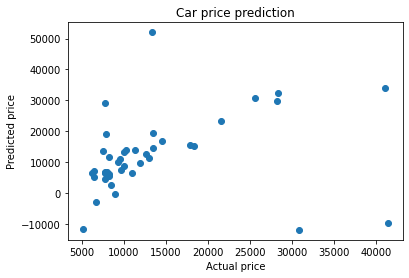

In [16]:
# Step 6: Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Car price prediction")
plt.show()

In [ ]:
# Additional steps to improve the model:

In [22]:
# 1. Regularization to prevent overfitting
from sklearn.linear_model import Ridge, Lasso

# Train Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Train Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate Ridge and Lasso models
ridge_pred = ridge.predict(X_test)
ridge_r2score = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Ridge R-squared score:", ridge_r2score)
print("Ridge Root mean squared error:", ridge_rmse)

lasso_pred = lasso.predict(X_test)
lasso_r2score = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Lasso R-squared score:", lasso_r2score)
print("Lasso Root mean squared error:", lasso_rmse)

Ridge R-squared score: 0.8629199064978939
Ridge Root mean squared error: 3289.6282105453342
Lasso R-squared score: 0.5778638782527276
Lasso Root mean squared error: 5772.791595863685


C:\Users\GOPAL\anaconda3\envs\DSV\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


In [23]:
# 2. Feature scaling to improve convergence of gradient-based algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Evaluate scaled model
y_pred_scaled = model_scaled.predict(X_test_scaled)
r2score_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print("Scaled R-squared score:", r2score_scaled)
print("Scaled Root mean squared error:", rmse_scaled)

Scaled R-squared score: -1.0067695469304826e+24
Scaled Root mean squared error: 8915067926487353.0


##  Regularization to prevent overfitting: In addition to the basic linear regression model, we also train Ridge and Lasso regression models, which introduce a penalty term to the loss function to discourage large coefficients and thus prevent overfitting. We also evaluate these models on the test set.